In [192]:
import pandas as pd
import sys
import numpy as np
import matplotlib as mpl
import pdb
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
import sklearn.metrics as metrics

# Trimming Data

In [28]:
all_nba = pd.read_csv("Data/all_nba_trimmed_data.csv")
cleaned_all_nba =  all_nba.drop('Unnamed: 0', 1)
cleaned_all_nba = cleaned_all_nba.drop('Name', 1)
cleaned_all_nba = cleaned_all_nba.drop('Season', 1)
cleaned_all_nba = cleaned_all_nba.drop('STL', 1)
cleaned_all_nba = cleaned_all_nba.drop('All-Star', 1)
cleaned_all_nba = cleaned_all_nba.drop('BLK', 1)
forwards_all_nba = cleaned_all_nba[cleaned_all_nba['Pos'] == 'F']
guards_all_nba = cleaned_all_nba[cleaned_all_nba['Pos'] == 'G']
centers_all_nba = cleaned_all_nba[cleaned_all_nba['Pos'] == 'C']

In [29]:
cleaned_all_nba = cleaned_all_nba.drop('Pos', 1)
forwards_all_nba = forwards_all_nba.drop('Pos', 1)
guards_all_nba = guards_all_nba.drop('Pos', 1)
#guards_all_nba  = guards_all_nba.drop('AST', 1)
centers_all_nba = centers_all_nba.drop('Pos', 1)

In [30]:
dataAll = cleaned_all_nba.to_numpy()
dataAll_F = forwards_all_nba.to_numpy()
dataAll_G = guards_all_nba.to_numpy()
dataAll_C = centers_all_nba.to_numpy()

In [31]:
actual_all_nba = cleaned_all_nba.loc[cleaned_all_nba['All-NBA'] == 1]
not_all_nba = cleaned_all_nba.loc[cleaned_all_nba['All-NBA'] == 0]

# Visualizing Data

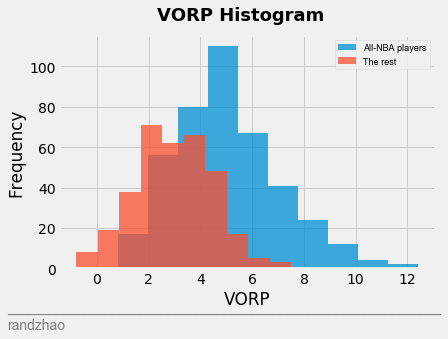

In [32]:
plt.style.use('fivethirtyeight')
vorp_hist, ax = plt.subplots()

ax.hist(actual_all_nba['VORP'], alpha = .75, label = 'All-NBA players')
ax.hist(not_all_nba['VORP'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Arial"})

ax.set_xlabel('VORP')
ax.set_ylabel('Frequency')

vorp_hist.suptitle("VORP Histogram", weight = 'bold', size = 18)

vorp_hist.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

vorp_hist.text(x = -0.04, y = -.14,
    s = 'randzhao',
    fontsize = 14, fontname = 'Arial', color = 'grey', horizontalalignment='left')

vorp_hist.savefig('Figures/vorp_hist.png', dpi = 400, bbox_inches = 'tight')

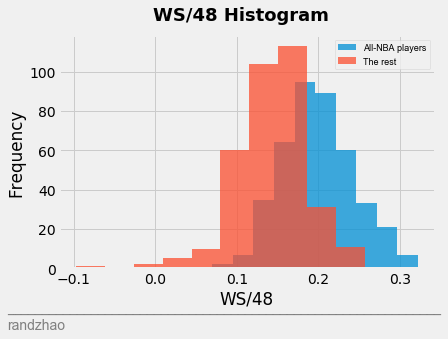

In [33]:
plt.style.use('fivethirtyeight')
ws_hist, ax = plt.subplots()

ax.hist(actual_all_nba['WS/48'], alpha = .75, label = 'All-NBA players')
ax.hist(not_all_nba['WS/48'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Arial"})

ax.set_xlabel('WS/48')
ax.set_ylabel('Frequency')

ws_hist.suptitle("WS/48 Histogram", weight = 'bold', size = 18)

ws_hist.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

ws_hist.text(x = -0.04, y = -.14,
    s = 'randzhao',
    fontsize = 14, fontname = 'Arial', color = 'grey', horizontalalignment='left')

ws_hist.savefig('Figures/ws_hist.png', dpi = 400, bbox_inches = 'tight')

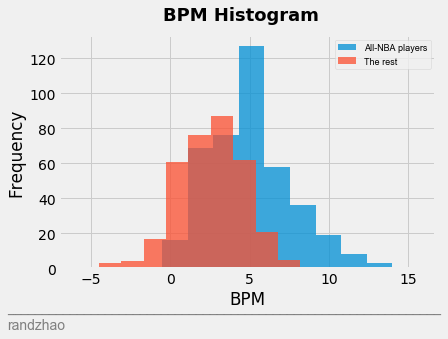

In [34]:
bpm_hist, ax = plt.subplots()

ax.hist(actual_all_nba['BPM'], alpha = .75, label = 'All-NBA players')
ax.hist(not_all_nba['BPM'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Arial"})

ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')

bpm_hist.suptitle("BPM Histogram", weight = 'bold', size = 18)

bpm_hist.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

bpm_hist.text(x = -0.04, y = -.14,
    s = 'randzhao',
    fontsize = 14, fontname = 'Arial', color = 'grey', horizontalalignment='left')
bpm_hist.savefig('Figures/bpm_hist.png', dpi = 400, bbox_inches = 'tight')

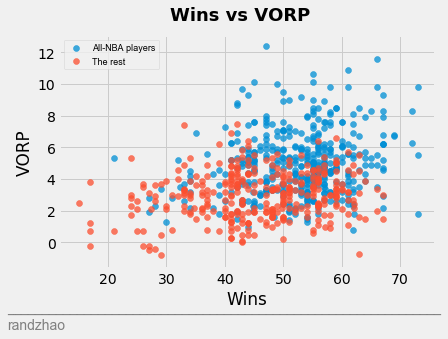

In [35]:
pposs_VORP, ax = plt.subplots()

ax.scatter(actual_all_nba['Wins'], actual_all_nba['VORP'], alpha = .75, label = 'All-NBA players')
ax.scatter(not_all_nba['Wins'], not_all_nba['VORP'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Arial"})

ax.set_xlabel('Wins')
ax.set_ylabel('VORP')

pposs_VORP.suptitle("Wins vs VORP", weight = 'bold', size = 18)

pposs_VORP.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

pposs_VORP.text(x = -0.04, y = -.14,
    s = 'randzhao',
    fontsize = 14, fontname = 'Arial', color = 'grey', horizontalalignment='left')

pposs_VORP.savefig('Figures/pposs_VORP.png', dpi = 400, bbox_inches = 'tight')

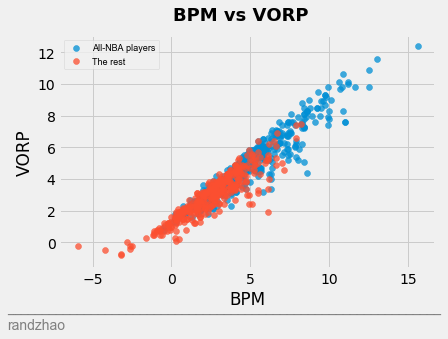

In [36]:
bpm_vorp, ax = plt.subplots()

ax.scatter(actual_all_nba['BPM'], actual_all_nba['VORP'], alpha = .75, label = 'All-NBA players')
ax.scatter(not_all_nba['BPM'], not_all_nba['VORP'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Arial"})

ax.set_xlabel('BPM')
ax.set_ylabel('VORP')

bpm_vorp.suptitle("BPM vs VORP", weight = 'bold', size = 18)

bpm_vorp.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

bpm_vorp.text(x = -0.04, y = -.14,
    s = 'randzhao',
    fontsize = 14, fontname = 'Arial', color = 'grey', horizontalalignment='left')

bpm_vorp.savefig('Figures/bpm_vorp.png', dpi = 400, bbox_inches = 'tight')

Text(-0.04,-0.14,'randzhao')

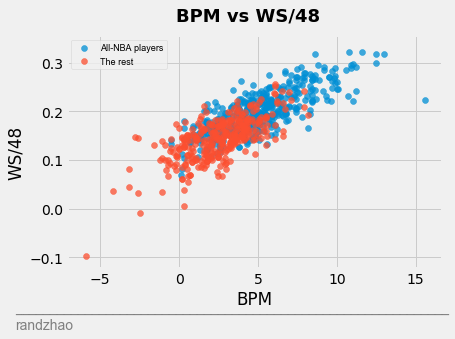

In [191]:
bpm_ws, ax = plt.subplots()

ax.scatter(actual_all_nba['BPM'], actual_all_nba['WS/48'], alpha = .75, label = 'All-NBA players')
ax.scatter(not_all_nba['BPM'], not_all_nba['WS/48'], alpha = .75, label = 'The rest')

ax.legend(loc='best', prop={'size': 9, "family": "Arial"})

ax.set_xlabel('BPM')
ax.set_ylabel('WS/48')

bpm_ws.suptitle("BPM vs WS/48", weight = 'bold', size = 18)

bpm_ws.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

bpm_ws.text(x = -0.04, y = -.14,
    s = 'randzhao',
    fontsize = 14, fontname = 'Arial', color = 'grey', horizontalalignment='left')

#bpm_ws.savefig('Figures/bpm_ws.png', dpi = 400, bbox_inches = 'tight')

# Create Models

In [38]:
X = dataAll[:, range(0, (dataAll.shape[1] - 1))] # getting all columns except last one
y = dataAll[:, -1] # getting only the last column
val_size = 0.1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_size)
eval_set = [(X_val, y_val)]

In [97]:
svmclf = svm.SVC(kernel='poly',gamma=0.001, probability = 1)
svmclf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=1, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
X_F = dataAll_F[:, range(0, (dataAll_F.shape[1] - 1))] # getting all columns except last one
y_F = dataAll_F[:, -1] # getting only the last column
val_size = 0.2
X_train_F, X_val_F, y_train_F, y_val_F = train_test_split(X_F, y_F, test_size = val_size)
eval_set_F = [(X_val_F, y_val_F)]

In [41]:
svmclf_f = svm.SVC(kernel='rbf',gamma=0.001, probability = 1)
svmclf_f.fit(X_train_F, y_train_F)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=1, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
X_C = dataAll_C[:, range(0, (dataAll_C.shape[1] - 1))] # getting all columns except last one
y_C = dataAll_C[:, -1] # getting only the last column
val_size = 0.1
X_train_C, X_val_C, y_train_C, y_val_C = train_test_split(X_C, y_C, test_size = val_size)
eval_set_C = [(X_val_C, y_val_C)]

In [83]:
svmclf_c = svm.SVC(kernel='rbf',gamma=0.001, probability = 1)
svmclf_c.fit(X_train_C, y_train_C)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=1, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [51]:
X_G = dataAll_G[:, range(0, (dataAll_G.shape[1] - 1))] # getting all columns except last one
y_G = dataAll_G[:, -1] # getting only the last column
val_size = 0.2
X_train_G, X_val_G, y_train_G, y_val_G = train_test_split(X_G, y_G, test_size = val_size)
eval_set_G= [(X_val_G, y_val_G)]

In [91]:
svmclf_g = svm.SVC(kernel='poly',gamma=0.001, probability = 1)
svmclf_g.fit(X_train_G, y_train_G)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=1, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Basic Goodness of Fit

In [124]:
def scores(model, xtest, ytest):
    y_pred = model.predict(xtest)
    
    print("Accuracy score: %.3f" % metrics.accuracy_score(ytest, y_pred))
    print("Recall: %.3f" % metrics.recall_score(ytest, y_pred))
    print("Precision: %.3f" % metrics.precision_score(ytest, y_pred))
    print("F1: %.3f" % metrics.f1_score(ytest, y_pred))

    proba = model.predict_proba(xtest)
    pos_prob = proba[:, 1]
    print("Area under ROC curve: %.3f" % metrics.roc_auc_score(ytest, pos_prob))
    print("Log loss: %.3f" % metrics.log_loss(ytest, proba))
    
    cv = cross_val_score(model, xtest, ytest, cv = 3, scoring = 'accuracy')
    print("Accuracy (cross validation score): %0.3f (+/- %0.3f)" % (cv.mean(), cv.std() * 2))
    
    return y_pred

In [125]:
print("Scores for SVC_G")
y_svc_g = scores(svmclf_g, X_val_G, y_val_G)

Scores for SVC_G
Accuracy score: 0.790
Recall: 0.806
Precision: 0.829
F1: 0.817
Area under ROC curve: 0.871
Log loss: 0.449
Accuracy (cross validation score): 0.822 (+/- 0.050)


In [126]:
print("Scores for SVC_F")
y_svc_f = scores(svmclf_f, X_val_F, y_val_F)

Scores for SVC_F
Accuracy score: 0.804
Recall: 0.833
Precision: 0.857
F1: 0.845
Area under ROC curve: 0.894
Log loss: 0.415
Accuracy (cross validation score): 0.715 (+/- 0.123)


In [127]:
print("Scores for SVC_C")
y_svc_c = scores(svmclf_c, X_val_C, y_val_C)

Scores for SVC_C
Accuracy score: 0.882
Recall: 0.778
Precision: 1.000
F1: 0.875
Area under ROC curve: 0.986
Log loss: 0.383
Accuracy (cross validation score): 0.700 (+/- 0.196)


In [128]:
print("Scores for SVC")
y_svc = scores(svmclf, X_val, y_val)

Scores for SVC
Accuracy score: 0.787
Recall: 0.750
Precision: 0.868
F1: 0.805
Area under ROC curve: 0.885
Log loss: 0.413
Accuracy (cross validation score): 0.785 (+/- 0.086)


# Confusion Matrices

In [99]:
def confusion_matrix(ytest, y_pred, model_name):
    cm = metrics.confusion_matrix(ytest, y_pred)

    plt.style.use("fivethirtyeight")
    z, ax = plt.subplots()

    sns.heatmap(cm, annot=True, ax = ax, linewidth = 2, fmt='g')

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    z.suptitle("%s Confusion Matrix" % model_name.upper(), weight = 'bold', size = 18, x = .45)
    
    z.text(x = 0, y = -0.08,
        s = '__________________________________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

    z.text(x = 0, y = -.14,
        s = 'randzhao',
        fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

    z.savefig('Figures/%s_cm.png' % model_name, dpi = 400, bbox_inches = 'tight')
    

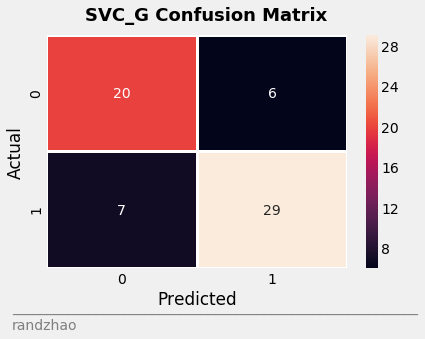

In [100]:
confusion_matrix(y_val_G, y_svc_g, 'SVC_G')

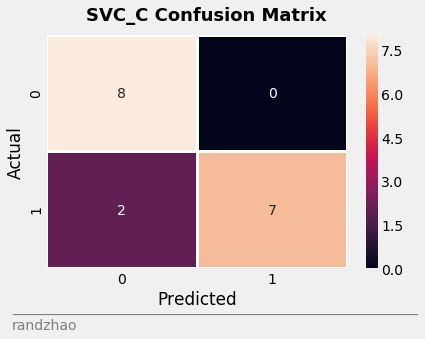

In [101]:
confusion_matrix(y_val_C, y_svc_c, 'SVC_C')

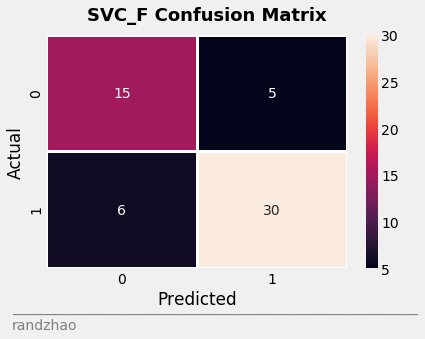

In [102]:
confusion_matrix(y_val_F, y_svc_f, 'SVC_F')

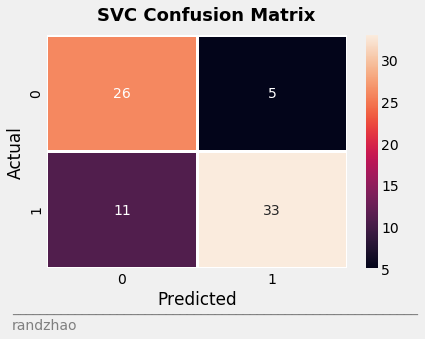

In [103]:
confusion_matrix(y_val, y_svc, 'SVC')

# Creating Test Data

In [104]:
test_nba = pd.read_csv("Data/test_nba_data_trimmed.csv")
names = test_nba["Name"]
cleaned_test =  test_nba.drop('Unnamed: 0', 1)
cleaned_test = cleaned_test.drop('Season', 1)
cleaned_test = cleaned_test.drop('STL', 1)
cleaned_test = cleaned_test.drop('All-Star', 1)
#cleaned_test = cleaned_test.drop('BLK', 1)
cleaned_test = cleaned_test.drop('All-NBA', 1)

forwards_test = cleaned_test[cleaned_test['Pos'] == 'F']
forwards_test = forwards_test.drop('Pos', 1)
forwards_test = forwards_test.drop('BLK', 1)

guards_test = cleaned_test[cleaned_test['Pos'] == 'G']
guards_test = guards_test.drop('Pos', 1)
guards_test = guards_test.drop('BLK', 1)
#guards_test = guards_test.drop('AST', 1)

centers_test = cleaned_test[cleaned_test['Pos'] == 'C']
centers_test = centers_test.drop('Pos', 1)

# cleaned_test = cleaned_test.drop('Pos', 1)
cleaned_test = cleaned_test.drop('BLK', 1)
cleaned_test.head()
testData = cleaned_test.to_numpy()
testData_F = forwards_test.to_numpy()
testData_G = guards_test.to_numpy()
testData_C = guards_test.to_numpy()

# ROC curve

In [105]:
proba_g = svmclf_g.predict_proba(X_val_G)
pos_prob_g = proba_g[:, 1]
fpr_g, tpr_g, threshold_g = metrics.roc_curve(y_val_G, pos_prob_g)

proba_f = svmclf_f.predict_proba(X_val_F)
pos_prob_f = proba_f[:, 1]
fpr_f, tpr_f, threshold_f = metrics.roc_curve(y_val_F, pos_prob_f)

proba_c = svmclf_c.predict_proba(X_val_C)
pos_prob_c = proba_c[:, 1]
fpr_c, tpr_c, threshold_c = metrics.roc_curve(y_val_C, pos_prob_c)

proba = svmclf.predict_proba(X_val)
pos_prob = proba[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_val, pos_prob)

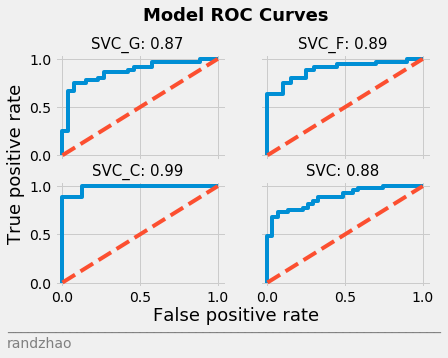

In [106]:
plt.style.use('fivethirtyeight')

roc, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True, sharex = True)

#fpr, tpr, pos_prob = roc_curve(svmclf_g)
ax1.plot(fpr_g, tpr_g)
ax1.plot([0, 1], [0, 1], linestyle = '--')
ax1.set_title("SVC_G: %.2f" % metrics.roc_auc_score(y_val_G, pos_prob_g), size = 15, x = .485, ha = 'center')

#fpr, tpr, pos_prob = roc_curve(svmclf_f)
ax2.plot(fpr_f, tpr_f)
ax2.plot([0, 1], [0, 1], linestyle = '--')
ax2.set_title("SVC_F: %.2f" % metrics.roc_auc_score(y_val_F, pos_prob_f), size = 15, x = .485, ha = 'center')

#fpr, tpr, pos_prob = roc_curve(svmclf_c)
ax3.plot(fpr_c, tpr_c)
ax3.plot([0, 1], [0, 1], linestyle = '--')
ax3.set_title("SVC_C: %.2f" % metrics.roc_auc_score(y_val_C, pos_prob_c), size = 15, x = .485, ha = 'center')


#fpr, tpr, pos_prob = roc_curve(svmclf)
ax4.plot(fpr, tpr)
ax4.plot([0, 1], [0, 1], linestyle = '--')
ax4.set_title("SVC: %.2f" % metrics.roc_auc_score(y_val, pos_prob), size = 15, x = .485, ha = 'center')

roc.text(-0.03, 0.5, "True positive rate", va='center', rotation='vertical', size = 18)
roc.text(0.5, -0.045, "False positive rate", ha = 'center', size = 18)

roc.suptitle("Model ROC Curves", y = 1.045, weight = 'bold', size = 18)

roc.text(x = -0.03, y = -0.08,
        s = '______________________________________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

roc.text(x = -0.03, y = -.14,
    s = 'randzhao',
    fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

roc.savefig('roc.png', dpi = 400, bbox_inches = 'tight')

# Predict

In [140]:
guards = {}
forwards = {}
centers = {}
allplayers = {}
for i in range(len(names)):
    #print(str(i)+" "+names[i]+" "+str(svmclf.predict_proba([testData[i][2:]])[0][1]))
    prob = 0
    pos = testData[i][1]
    if pos == 'G':
        print(str(i)+" "+names[i]+" "+str(svmclf_g.predict_proba([testData[i][2:]])[0][1]))
        prob += svmclf_g.predict_proba([testData[i][2:]])[0][1]
        guards[names[i]] = [pos, prob]
    elif pos == 'F':
        print(str(i)+" "+names[i]+" "+str(svmclf_f.predict_proba([testData[i][2:]])[0][1]))
        prob += svmclf_f.predict_proba([testData[i][2:]])[0][1]
        forwards[names[i]] = [pos, prob]
    elif pos == 'C':
        print(str(i)+" "+names[i]+" "+str(svmclf_c.predict_proba([testData[i][2:]])[0][1]))
        prob += svmclf_c.predict_proba([testData[i][2:]])[0][1]
        centers[names[i]] = [pos, prob]
    allplayers[names[i]] = svmclf.predict_proba([testData[i][2:]])[0][1]

0 James Harden 0.9999999970340235
1 Giannis Antetokounmpo 0.9999954862690166
2 Stephen Curry 0.957944472593661
3 LeBron James 0.8079113099160504
4 Kevin Durant 0.9511036858493855
5 Kawhi Leonard 0.970890086900025
6 Anthony Davis 0.5629901339686143
7 Kevin Durant 0.9511036858493855
8 Nikola Jokic 0.9498433519797458
9 Paul George 0.9220347442936063
10 Kyrie Irving 0.8437799409626251
11 Joel Embiid 0.9227247808674441
12 Rudy Gobert 0.8393755445392529
13 Damian Lillard 0.93098960187526
14 Karl-Anthony Towns 0.6382852619150876
15 Blake Griffin 0.6943992658641488
16 Russell Westbrook 0.8663515326791085
17 Jimmy Butler 0.17496031221363167
18 Kemba Walker 0.589960833528213
19 Ben Simmons 0.3558714250203191
20 Kyle Lowry 0.26625280281090735
21 Bradley Beal 0.273012528034369
22 Mike Conley 0.24571486828443315
23 Jrue Holiday 0.1543751819868113
24 LaMarcus Aldridge 0.4272976350114888
25 Nikola Vucevic 0.7612767720685202
26 Victor Oladipo 0.1834966738595086
27 Klay Thompson 0.17269701106905708
28 

In [143]:
guards_prob = sorted(guards.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)
print(sorted(guards.items(), key = 
             lambda kv:(kv[1], kv[0]), reverse=True)) 

[('James Harden', ['G', 0.9999999970340235]), ('Stephen Curry', ['G', 0.957944472593661]), ('Damian Lillard', ['G', 0.93098960187526]), ('Russell Westbrook', ['G', 0.8663515326791085]), ('Kyrie Irving', ['G', 0.8437799409626251]), ('DAngelo Russell', ['G', 0.6123762355081755]), ('Kemba Walker', ['G', 0.589960833528213]), ('Ben Simmons', ['G', 0.3558714250203191]), ('Bradley Beal', ['G', 0.273012528034369]), ('Kyle Lowry', ['G', 0.26625280281090735]), ('Mike Conley', ['G', 0.24571486828443315]), ('Victor Oladipo', ['G', 0.1834966738595086]), ('Jimmy Butler', ['G', 0.17496031221363167]), ('Klay Thompson', ['G', 0.17269701106905708]), ('Jrue Holiday', ['G', 0.1543751819868113])]


In [144]:
forwards_prob = sorted(forwards.items(), key = 
             lambda kv:(kv[1], kv[0]), reverse=True)
print(sorted(forwards.items(), key = 
             lambda kv:(kv[1], kv[0]), reverse=True)) 

[('Giannis Antetokounmpo', ['F', 0.9999954862690166]), ('Kawhi Leonard', ['F', 0.970890086900025]), ('Kevin Durant', ['F', 0.9511036858493855]), ('Paul George', ['F', 0.9220347442936063]), ('LeBron James', ['F', 0.8079113099160504]), ('Blake Griffin', ['F', 0.6943992658641488]), ('Khris Middleton', ['F', 0.3073805229716456])]


In [145]:
centers_prob = sorted(centers.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True)
print(sorted(centers.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse=True))

[('Nikola Jokic', ['C', 0.9498433519797458]), ('Joel Embiid', ['C', 0.9227247808674441]), ('Rudy Gobert', ['C', 0.8393755445392529]), ('Nikola Vucevic', ['C', 0.7612767720685202]), ('Karl-Anthony Towns', ['C', 0.6382852619150876]), ('Anthony Davis', ['C', 0.5629901339686143]), ('LaMarcus Aldridge', ['C', 0.4272976350114888])]


In [157]:
total_list = guards_prob+forwards_prob+centers_prob
avg_list = []
for i in range(len(total_list)):
    avg_proba = (total_list[i][1][1] +  allplayers[total_list[i][0]]) / 2
    avg_list.append( [total_list[i][0], total_list[i][1][0], avg_proba] )
print(sorted(avg_list, key = 
            lambda kv:kv[2], reverse=True))

[['James Harden', 'G', 0.9999999984515939], ['Giannis Antetokounmpo', 'F', 0.9999975946630456], ['Nikola Jokic', 'C', 0.9702156730103467], ['Stephen Curry', 'G', 0.9674002308186442], ['Joel Embiid', 'C', 0.9539080072355914], ['Kevin Durant', 'F', 0.9524449611560182], ['Damian Lillard', 'G', 0.9469448956034082], ['Kawhi Leonard', 'F', 0.9329985229895993], ['Russell Westbrook', 'G', 0.89843003915101], ['Paul George', 'F', 0.895234721459669], ['Kyrie Irving', 'G', 0.8505425348249932], ['Rudy Gobert', 'C', 0.8327352476192764], ['Nikola Vucevic', 'C', 0.8096844499635618], ['Karl-Anthony Towns', 'C', 0.7068595306378459], ['LeBron James', 'F', 0.7001424695556587], ['Blake Griffin', 'F', 0.6657361960590535], ['DAngelo Russell', 'G', 0.6161002017759954], ['Kemba Walker', 'G', 0.6064981259079352], ['Anthony Davis', 'C', 0.5117078244765422], ['LaMarcus Aldridge', 'C', 0.4410461508760464], ['Ben Simmons', 'G', 0.4033393340894499], ['Khris Middleton', 'F', 0.2587281836158219], ['Kyle Lowry', 'G', 0

In [186]:
def get_allnba(all_list):
    cur_team = {}
    cur_team['G'] = 0
    cur_team['F'] = 0
    cur_team['C'] = 0
    team_assign = {}
    for player in all_list:
        name = player[0]
        pos = player[1]
        proba = player[2]
        place = cur_team[pos]
        if not pos == 'C':
            team = (place // 2) + 1
        else:
            team = place + 1
        team = min(team, 4)
        team_assign[name] = [team, proba]
        cur_team[pos] += 1
    print(team_assign)

In [187]:
get_allnba(sorted(avg_list, key = 
            lambda kv:kv[2], reverse=True))

{'James Harden': [1, 0.9999999984515939], 'Giannis Antetokounmpo': [1, 0.9999975946630456], 'Nikola Jokic': [1, 0.9702156730103467], 'Stephen Curry': [1, 0.9674002308186442], 'Joel Embiid': [2, 0.9539080072355914], 'Kevin Durant': [1, 0.9524449611560182], 'Damian Lillard': [2, 0.9469448956034082], 'Kawhi Leonard': [2, 0.9329985229895993], 'Russell Westbrook': [2, 0.89843003915101], 'Paul George': [2, 0.895234721459669], 'Kyrie Irving': [3, 0.8505425348249932], 'Rudy Gobert': [3, 0.8327352476192764], 'Nikola Vucevic': [4, 0.8096844499635618], 'Karl-Anthony Towns': [4, 0.7068595306378459], 'LeBron James': [3, 0.7001424695556587], 'Blake Griffin': [3, 0.6657361960590535], 'DAngelo Russell': [3, 0.6161002017759954], 'Kemba Walker': [4, 0.6064981259079352], 'Anthony Davis': [4, 0.5117078244765422], 'LaMarcus Aldridge': [4, 0.4410461508760464], 'Ben Simmons': [4, 0.4033393340894499], 'Khris Middleton': [4, 0.2587281836158219], 'Kyle Lowry': [4, 0.2395622980727155], 'Bradley Beal': [4, 0.2296

In [71]:
headers = ['Name', 'Pos Proba', 'Total Proba']
df = pd.DataFrame(total_list, columns=headers)

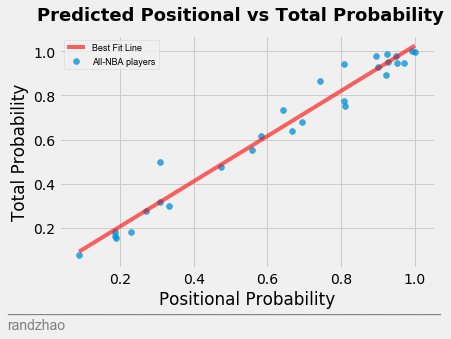

In [200]:
proba, ax = plt.subplots()

ax.scatter(df['Pos Proba'], df['Total Proba'], alpha = .75, label = 'All-NBA players')

ax.plot(np.unique(df['Pos Proba']), 
        np.poly1d(np.polyfit(df['Pos Proba'], df['Total Proba'], 1))(np.unique(df['Pos Proba'])),
       alpha =  0.6, label = 'Best Fit Line', color = 'red')

ax.legend(loc='best', prop={'size': 9, "family": "Arial"})

ax.set_xlabel('Positional Probability')
ax.set_ylabel('Total Probability')

proba.suptitle("Predicted Positional vs Total Probability", weight = 'bold', size = 18)

proba.text(x = -0.04, y = -0.08,
    s = '______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

proba.text(x = -0.04, y = -.14,
    s = 'randzhao',
    fontsize = 14, fontname = 'Arial', color = 'grey', horizontalalignment='left')

proba.savefig('Figures/proba.png', dpi = 400, bbox_inches = 'tight')

In [209]:
kmeans = KMeans(n_clusters = 4, random_state = 99)

x = np.column_stack((df['Pos Proba'], df['Total Proba']))

kmeans.fit(x)

y_kmeans = kmeans.predict(x)

In [214]:
clusters = {}
for name, j in zip(df['Name'], y_kmeans):
    clusters[name] = j
print(sorted(clusters.items(), key = 
            lambda kv:kv[1]))

[('James Harden', 0), ('Stephen Curry', 0), ('Damian Lillard', 0), ('Kyrie Irving', 0), ('Russell Westbrook', 0), ('Giannis Antetokounmpo', 0), ('Kawhi Leonard', 0), ('Kevin Durant', 0), ('Paul George', 0), ('Nikola Jokic', 0), ('Joel Embiid', 0), ('Kyle Lowry', 1), ('Victor Oladipo', 1), ('Klay Thompson', 1), ('Mike Conley', 1), ('Jimmy Butler', 1), ('Bradley Beal', 1), ('Jrue Holiday', 1), ('Khris Middleton', 1), ('Kemba Walker', 2), ('Ben Simmons', 2), ('Anthony Davis', 2), ('LaMarcus Aldridge', 2), ('DAngelo Russell', 3), ('LeBron James', 3), ('Blake Griffin', 3), ('Rudy Gobert', 3), ('Nikola Vucevic', 3), ('Karl-Anthony Towns', 3)]


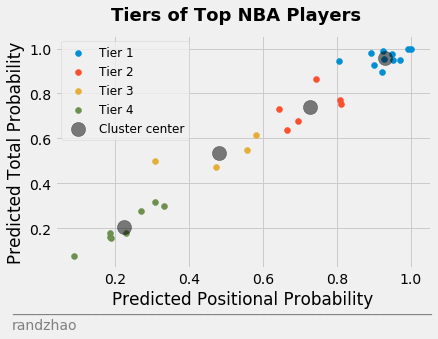

In [211]:
plt.style.use('fivethirtyeight')

tiers, ax = plt.subplots()

cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []

for i in range(len(y_kmeans)):
    if(y_kmeans[i] == 0):
        cluster_1.append(x[i])
    elif(y_kmeans[i] == 3):
        cluster_2.append(x[i])
    elif(y_kmeans[i] == 2):
        cluster_3.append(x[i])
    elif(y_kmeans[i] == 1):
        cluster_4.append(x[i])
        
cluster_1 = np.vstack(cluster_1)
cluster_2 = np.vstack(cluster_2)
cluster_3 = np.vstack(cluster_3)
cluster_4 = np.vstack(cluster_4)

ax.scatter(cluster_1[:, 0], cluster_1[:, 1], label = "Tier 1")
ax.scatter(cluster_2[:, 0], cluster_2[:, 1], label = "Tier 2")
ax.scatter(cluster_3[:, 0], cluster_3[:, 1], label = "Tier 3")
ax.scatter(cluster_4[:, 0], cluster_4[:, 1], label = "Tier 4")

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = .5, label = 'Cluster center')

ax.legend(loc='best', prop={'size': 12, "family": "DejaVu Sans"})

ax.set_xlabel('Predicted Positional Probability')
ax.set_ylabel('Predicted Total Probability')

tiers.suptitle("Tiers of Top NBA Players", weight = 'bold', size = 18)

tiers.text(x = -0.02, y = -0.08,
    s = '____________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

tiers.text(x = -0.02, y = -.14,
    s = 'randzhao',
    fontsize = 14, fontname = 'DejaVu Sans', color = 'grey', horizontalalignment='left')

tiers.savefig('Figures/tiers.png', dpi = 400, bbox_inches = 'tight')

